In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import kagglehub

In [5]:
gpiosenka_tree_nuts_image_classification_path = kagglehub.dataset_download('gpiosenka/tree-nuts-image-classification')
print('Data source import complete.')


Data source import complete.


In [6]:
train_dir = os.path.join(gpiosenka_tree_nuts_image_classification_path, 'train')
valid_dir = os.path.join(gpiosenka_tree_nuts_image_classification_path, 'valid')
test_dir = os.path.join(gpiosenka_tree_nuts_image_classification_path, 'test')


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)


Found 1163 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Number of classes: 10


In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=12
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 545ms/step - accuracy: 0.2280 - loss: 2.2113 - val_accuracy: 0.6562 - val_loss: 1.4304
Epoch 2/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4688 - loss: 1.7811 - val_accuracy: 0.5312 - val_loss: 1.5313
Epoch 3/12


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 360ms/step - accuracy: 0.5632 - loss: 1.4897 - val_accuracy: 0.8125 - val_loss: 0.9212
Epoch 4/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6875 - loss: 1.3000 - val_accuracy: 0.7188 - val_loss: 1.0468
Epoch 5/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 365ms/step - accuracy: 0.6926 - loss: 1.1253 - val_accuracy: 0.8438 - val_loss: 0.6963
Epoch 6/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7812 - loss: 0.8544 - val_accuracy: 0.8750 - val_loss: 0.7168
Epoch 7/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 383ms/step - accuracy: 0.7352 - loss: 0.9166 - val_accuracy: 0.8750 - val_loss: 0.5339
Epoch 8/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.7053 - val_accuracy: 0.8750 - val_loss: 0.5183
Epoch 9/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 574ms/step - accuracy: 0.7817 - loss: 0.7684 - val_accuracy: 0.8750 - val_loss: 0.5359
Epoch 10/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.9919 - val_accuracy: 0.9062 - val_l

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.2790

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9733 - loss: 0.3217
Test Accuracy: 96.00%
Test Loss: 0.3431


In [12]:
test_images_path = test_dir
categories = os.listdir(test_images_path)
random_images = []

for _ in range(5):
    random_class = random.choice(categories)
    class_path = os.path.join(test_images_path, random_class)
    random_image = random.choice(os.listdir(class_path))
    random_images.append((os.path.join(class_path, random_image), random_class))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


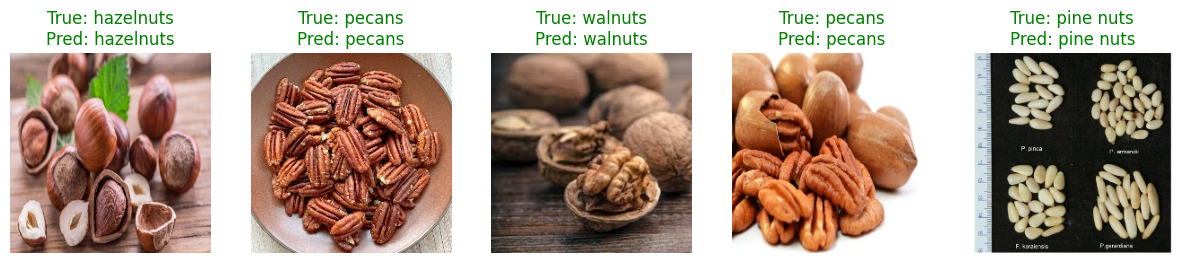

In [13]:
plt.figure(figsize=(15, 8))

for i, (img_path, true_label) in enumerate(random_images):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    pred_class = np.argmax(pred)
    pred_label = list(train_generator.class_indices.keys())[pred_class]
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=12, color="green" if true_label == pred_label else "red")

plt.show()